# Vizualiations and descriptive statistics

Overview:  
 - Plotting of area over time: Geomap with iterations over different year points
 - Timeseries of sector over time
 
Udvikling i jobtyper/-funktioner over tid.

- Hvilke typer arbejdskraft bliver der efterspurgt over tid (absolut antal)?
- Hvilke typer arbejdskraft efterspørges der ikke længere (relativ antal/ændring)?
- Er der reformer/brud der har haft indflydelse (finanskrisen/dagpengereformen/etc.)?

Geografiske ændringer over tid

- Hvor efterspørges der arbejdskraft (før og nu)?
- Hvor efterspørges der ikke arbejdskraft (før og nu)?
- Har der været tendens til at jobsne rykkes ind i byer (eller har de altid været i byer)?
- Er der reformer/brud der har haft indflydelse (finanskrisen/dagpengereformen/etc.)?


In [7]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
# sns.set_style("whitegrid", {'axes.grid' : True})

In [45]:
path = "C:/Users/Naeim.S/Documents/GitHub/GRP33/EXAM/Dataset/JobIndex3 grafer.xlsx"
# cols = list(range(1,9))
jobindex = pd.read_excel(path)
# df = data
jobindex.groupby("year")

jobindex_year

Text(0.5,6.8,'')

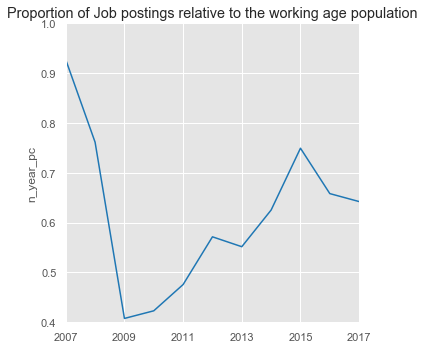

In [31]:
sns.relplot(x="year", y="n_year_pc", kind="line", ci=None, data=jobindex)
# plt.xlim(2007,2017)
plt.title("Proportion of Job postings relative to the working age population")
plt.ylim(0.4,1)
plt.xticks(range(2007,2018,2))
plt.xlim(2007,2017)
plt.xlabel("")

Text(0.5,20.8,'')

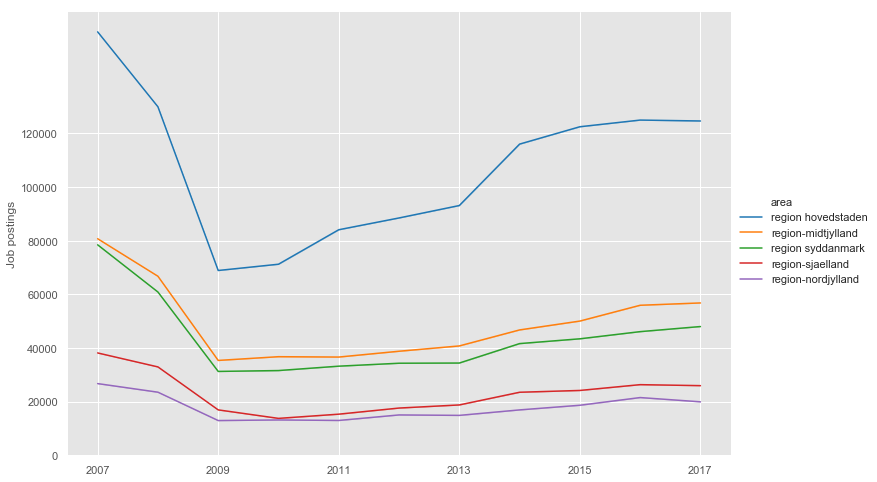

In [29]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
jobindex_area = jobindex.query(' area != "danmark"').sort_values(by=["n_area","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="n_area", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            data=jobindex_area)
plt.ylabel("Job postings")
plt.yticks(range(0,120001,20000))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("")

Text(0.5,1,'Job postings by sektor in the northern Jutland')

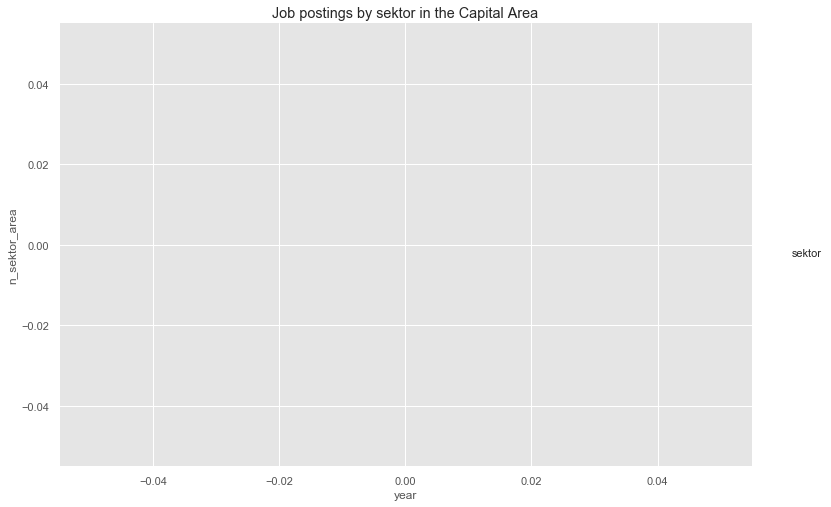

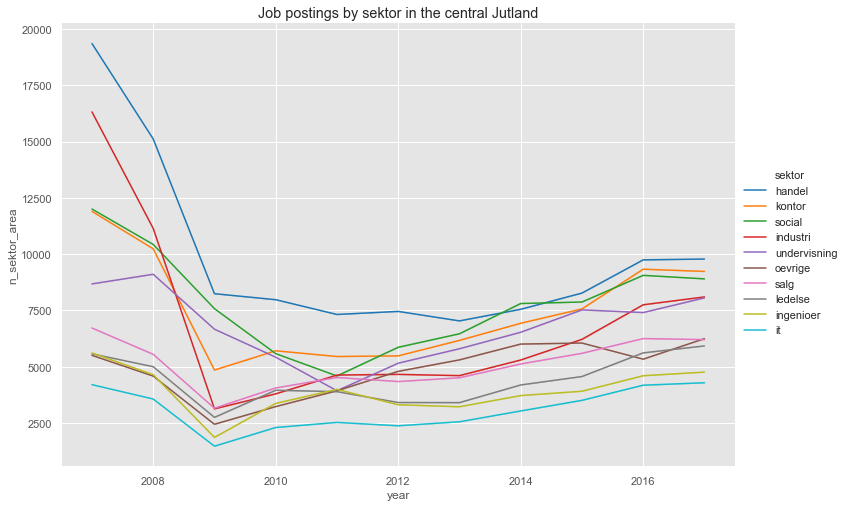

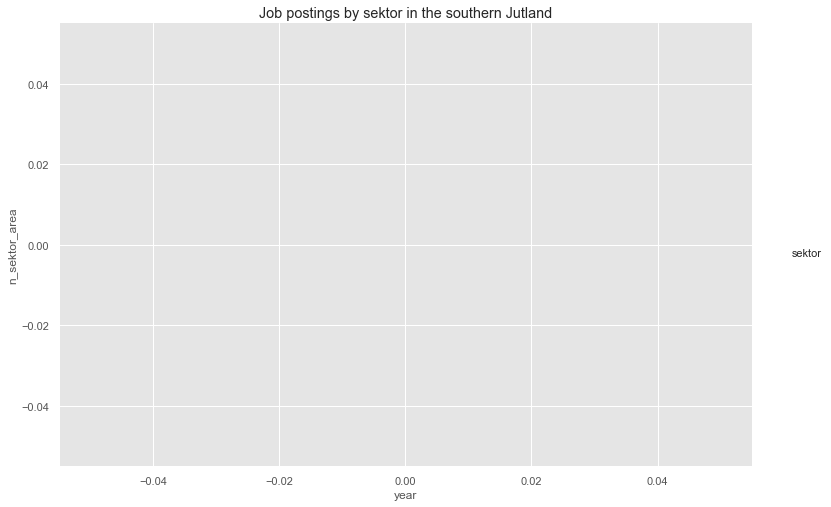

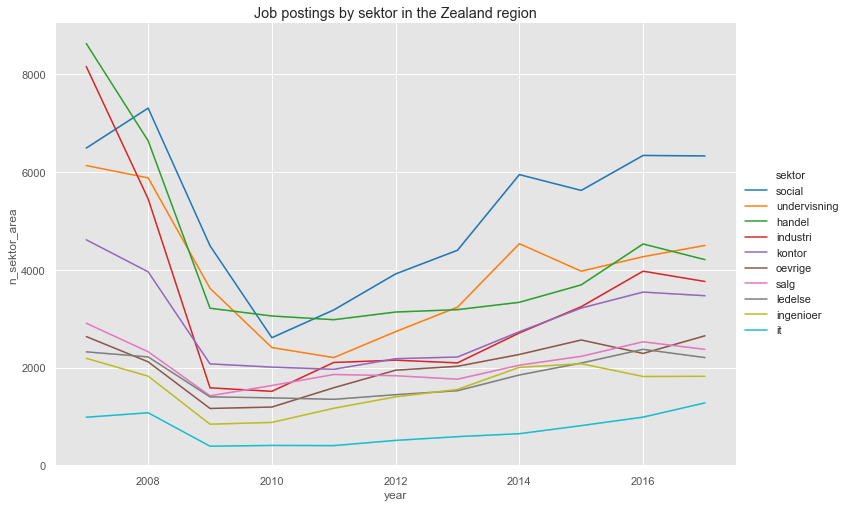

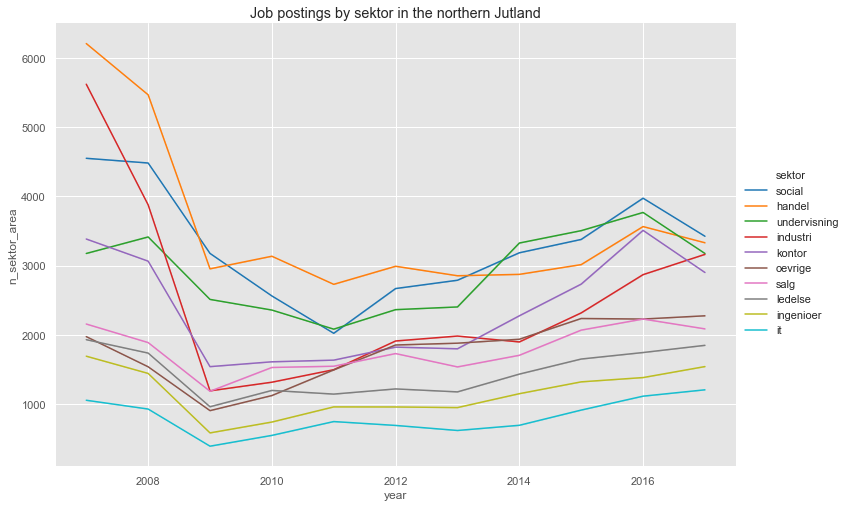

In [47]:
sns.set_palette("tab10")
#KØBENHAVN
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        data=jobindex.query('area == "storkoebenhavn" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the Capital Area")

#MIDTJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-midtjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the central Jutland")

#SYDJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "sydjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the southern Jutland")

#REGION SJÆLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-sjaelland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the Zealand region")

#NORDJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-nordjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the northern Jutland")

Text(0.5,1,'Job Postings by area and sector in 2007')

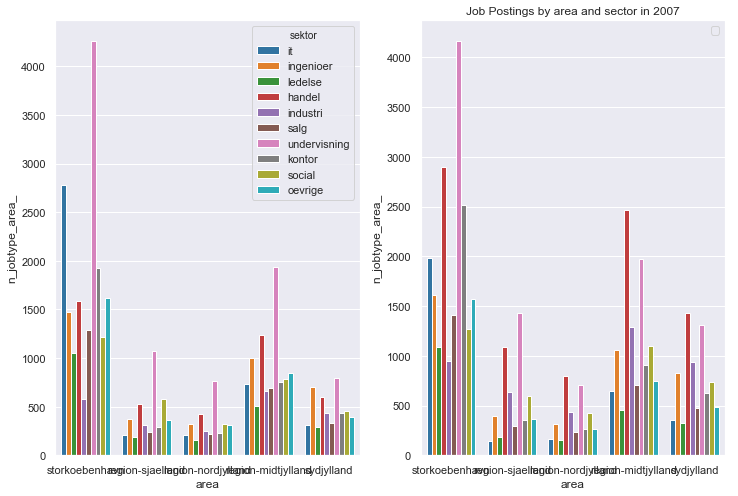

In [26]:
jobindex_topfem = jobindex.query(' area == "storkoebenhavn" | area == "region-midtjylland" | area == "sydjylland" | area == "region-sjaelland" | area == "region-nordjylland"' )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

sns.barplot(x="area", y="n_jobtype_area_", 
            hue="sektor",
            ci=None,
            
            ax = ax1,
            data=jobindex_topfem.query('year == 2017'))
plt.title("Job Postings by area and sector in 2017")

sns.barplot(x="area", y="n_jobtype_area_", 
            hue="sektor",
            ci=None,
            ax = ax2,
            data=jobindex_topfem.query('year == 2007'))
plt.legend([])
plt.title("Job Postings by area and sector in 2007")

In [ ]:
# Plotting timeseries of sector over year
data = 
data['country'] = data['station'].apply(extract_letters)

# This simply plots the same figure as above 
# but this time split by country. 
data.groupby(['country', 'datetime_dt'])\
    .agg('mean')\ 
    .reset_index()\
    .set_index('datetime_dt')\ #Set index to year
    .groupby('country')\ #Groupby: 
    .obs_value\
    .plot(figsize=[11,6])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()